In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

% matplotlib inline

In [2]:
# Load data
train_df = pd.read_csv("~/real_estate/data/v9/train_df.csv")

smote_features = train_df.columns[:-1]

In [3]:
scaled_target = (train_df["target"].values - min(train_df["target"]))/(
    max(train_df["target"]) - min(train_df["target"]))

target_groups = []

for i in scaled_target:
    target = int(np.floor(i*30))
    target_groups.append(target)

In [4]:
indices_first = [i for i, x in enumerate(target_groups) if x in [0,1]]
indices_last = [i for i, x in enumerate(target_groups) if x in [26,27,28,29,30]]

for i in indices_first:
    target_groups[i] = 2
for i in indices_last:
    target_groups[i] = 25

In [6]:
ratios = {}
len_target_groups = len(target_groups)
len_majority_group = 2420
majority_group_fraction = len_majority_group/len_target_groups

for i in range(2,26):
    len_group = len([j for j in target_groups if j == i])
    group_fraction = len_group/len_majority_group
    difference = 1 - group_fraction
    ratio_ = 1 - difference/2
    ratios[i] = int(ratio_*len_majority_group)

In [7]:
smote = SMOTE(k_neighbors=5, sampling_strategy=ratios, random_state=42)
X_res, y_res = smote.fit_resample(train_df[smote_features].values, target_groups)
X_res = pd.DataFrame(X_res, columns=smote_features)

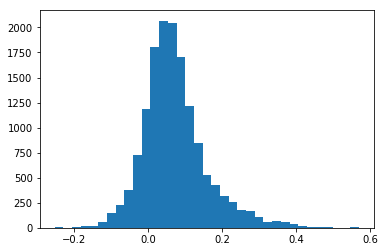

In [8]:
plt.hist(train_df["target"], bins=35)
plt.show()

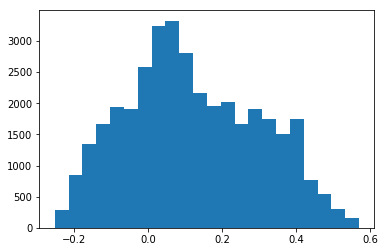

In [9]:
plt.hist(X_res["target"], bins=22)
plt.show()

In [10]:
X_res.to_csv("~/real_estate/data/v9/train_df_smote_ratio.csv", index=False)